# Load Data From Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


4/1wGV2UEfriw-Jk1vh6OL8kAvm1efoohXqE4jOrgqcRJ3yJ65mnqNop4

# Libraries


In [2]:
!pip install -U yellowbrick


     |████████████████████████████████| 266kB 3.5MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

from gensim.models import word2vec, Word2Vec
from gensim.models import Doc2Vec
from gensim.models.word2vec import Text8Corpus

from nltk.cluster import KMeansClusterer
import nltk

from bokeh.plotting import ColumnDataSource

from scipy import sparse as sp

import datetime
import hashlib

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import multiprocessing
import itertools
import string
import re
import sys
import ast

nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#run before

In [4]:
dataAll = pd.DataFrame(columns=['stopword'])
for month in range(4,9):
  for date in range(1,30,5):
    datebeingrun = '{}_{}_16'.format(month,date)
    isfile = os.path.isfile("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))
    if(isfile == False): continue

    print(datebeingrun)
    data= pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))
    #print(data.shape)
    dataAll = pd.concat([dataAll,data])
print(dataAll.shape)

4_16_16
4_21_16
4_26_16
5_1_16
5_6_16
5_11_16
5_16_16
5_21_16
5_26_16
6_1_16
6_6_16
6_11_16
6_16_16
6_21_16
6_26_16
7_1_16
7_6_16
7_11_16
7_16_16
7_21_16
7_26_16
8_1_16
8_6_16
8_11_16
8_16_16
8_21_16
8_26_16
(246975, 3)


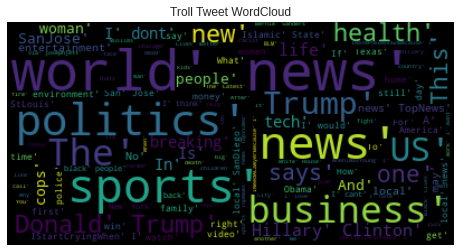

In [5]:
text = dataAll['stopword']
wordcloud = WordCloud().generate(''.join(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Troll Tweet WordCloud")
plt.savefig('/content/drive/My Drive/WordCloud/WholeWord2VecWordcloud.png'.format(datebeingrun))
plt.show()


# Word Embeddings


In [6]:
list_tweets = dataAll['stopword'].tolist()
import ast
for i in range(len(list_tweets)):
    list_tweets[i] = ast.literal_eval(list_tweets[i])

print(len(list_tweets))

w2vmodel = Word2Vec(list_tweets, min_count=2,
                      window=2, 
                      size=300,
                      sample=1e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      sg = 1)

data = w2vmodel[w2vmodel.wv.vocab]
print(len(w2vmodel.wv.vocab))



246975
57175


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [7]:
print(len(w2vmodel.wv.vocab))

57175


In [8]:
data = w2vmodel[w2vmodel.wv.vocab]
print(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[[ 0.03087397 -0.04568971  0.00966488 ...  0.05380488 -0.01435505
  -0.12115172]
 [ 0.02960376 -0.04762768  0.01396147 ...  0.05517529 -0.01630795
  -0.12780653]
 [ 0.03021484 -0.04417792  0.01246494 ...  0.05133396 -0.01312007
  -0.12809923]
 ...
 [ 0.02798723 -0.03977142  0.01335777 ...  0.04813224 -0.00898144
  -0.11268187]
 [ 0.02360393 -0.03637211  0.00977216 ...  0.04216424 -0.0094024
  -0.0992414 ]
 [ 0.02855691 -0.0429277   0.01409595 ...  0.05098224 -0.00953515
  -0.11722135]]


#other

4_16_16


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


set complete
4_21_16
set complete
4_26_16
set complete
5_1_16
set complete
5_6_16
set complete
5_11_16
set complete
5_16_16
set complete
5_21_16
set complete
5_26_16
set complete
6_1_16
set complete
6_6_16
set complete
6_11_16
set complete
6_16_16
set complete
6_21_16
set complete
6_26_16
set complete
7_1_16
set complete
7_6_16
set complete
7_11_16
set complete
7_16_16
set complete
7_21_16
set complete
7_26_16
set complete
8_1_16
set complete
8_6_16
set complete
8_11_16
set complete
8_16_16
set complete
8_21_16
set complete
8_26_16
set complete


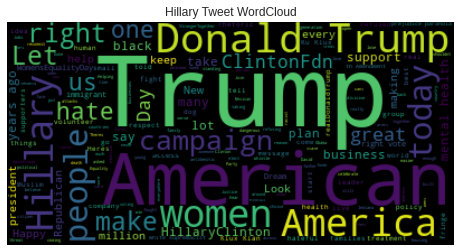

In [22]:
similarities = []

for month in range(4,9):
  for date in range(1,30,5):
    datebeingrun = '{}_{}_16'.format(month,date)
    isfile = os.path.isfile("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))
    if(isfile == False): continue

    print(datebeingrun)
    dataNew = pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))

    dataNew['publish_date'] = pd.to_datetime(dataNew.publish_date)

    dataNew = dataNew.sort_values(by=['publish_date'])

    dateMN = dataNew['publish_date'].min()
    dateMX = dataNew['publish_date'].max()

    #----------------- figure ------------------#
    
    hillarytweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/hillarytweets.csv')
    trumptweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/trumptweets.csv')

    hillarytweet['time'] =pd.to_datetime(hillarytweet.time)
    trumptweet['time'] =pd.to_datetime(trumptweet.time)

    datestart = dateMN.to_pydatetime() - datetime.timedelta(2)
    dateend = dateMX.to_pydatetime()

    hillaryrangetweets = hillarytweet.loc[(hillarytweet['time'] > datestart) & (hillarytweet['time'] < dateend),['time','stopword']]
    trumprangetweets = trumptweet.loc[(trumptweet['time'] > datestart) & (trumptweet['time'] < dateend),['time','stopword']]


    trumptweet_list = trumprangetweets['stopword'].tolist()
    trumptweet_str = ""
    for i in range(len(trumptweet_list)):
      for j in (ast.literal_eval(trumptweet_list[i])):
        trumptweet_str += j + ' '

    hillarytweet_list = hillaryrangetweets['stopword'].tolist()
    hillarytweet_str = ""
    for i in range(len(hillarytweet_list)):
      for j in (ast.literal_eval(hillarytweet_list[i])):
        hillarytweet_str += j + ' '

    trolltweet_list = dataNew['stopword'].tolist()
    trolltweet_str = ""
    for i in range(len(trolltweet_list)):
      for j in (ast.literal_eval(trolltweet_list[i])):
        trolltweet_str += j + ' '

    #---------------- wordcloud ----------------#

    text = trolltweet_list
    wordcloud = WordCloud().generate(trolltweet_str)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Troll Tweet WordCloud")
    plt.savefig('/content/drive/My Drive/savedfigure/date{}/TrollWordcloud{}.png'.format(datebeingrun,datebeingrun))
    #plt.show()
    

    '''trump'''
    wordcloudTrump = WordCloud().generate(trumptweet_str)

    plt.imshow(wordcloudTrump, interpolation='bilinear')
    plt.axis("off")
    plt.title("Trump Tweet WordCloud")
    plt.savefig('/content/drive/My Drive/savedfigure/date{}/TrumpWordcloud{}.png'.format(datebeingrun,datebeingrun))
    #plt.show()


    '''hillary'''
    wordcloudHillary = WordCloud().generate(hillarytweet_str)

    plt.imshow(wordcloudHillary, interpolation='bilinear')
    plt.axis("off")
    plt.title("Hillary Tweet WordCloud")
    plt.savefig('/content/drive/My Drive/savedfigure/date{}/HillaryWordcloud{}.png'.format(datebeingrun,datebeingrun))
    #plt.show()

    #---------------- topwords ----------------#

    trollinVec = []
    trumpinVec = []
    hillaryinVec = []

    for i in wordcloud.words_.keys():
      tmp = i.replace("\'","")
      if tmp in w2vmodel.wv.vocab:
        trollinVec.append(tmp)

    for i in wordcloudTrump.words_.keys():
      tmp = i.replace("\'","")
      if tmp in w2vmodel.wv.vocab:
        trumpinVec.append(tmp)

    for i in wordcloudHillary.words_.keys():
      tmp = i.replace("\'","")
      if tmp in w2vmodel.wv.vocab:
        hillaryinVec.append(tmp)

    #------------------create set--------------#

    introll = set()

    for troll_word in trollinVec:
      for i in w2vmodel.wv.most_similar(troll_word):
        combine = i[0]+troll_word

        introll.add(hash(combine))
    print("set complete")
    #---------------- overlaps ----------------#
    
    trumpOverlap = 0
    hillaryOverlap = 0

    for figure_word in trumpinVec:
      for troll_word in trollinVec:
        if(figure_word == troll_word):
          trumpOverlap+=1
          break;

        combine = figure_word+troll_word
        if(hash(combine) in introll):
          trumpOverlap+=1
          break;

    for figure_word in hillaryinVec:
      for troll_word in trollinVec:
        if(figure_word == troll_word):
          hillaryOverlap+=1
          break;
        
        combine = figure_word+troll_word
        if(hash(combine) in introll):
          hillaryOverlap+=1
          break;

    similarities.append([datebeingrun,trumpOverlap,hillaryOverlap])

In [24]:
df = pd.DataFrame(data=similarities, columns= ['date','hillary overlap', 'trump overlap'])
df.to_csv("/content/drive/My Drive/overlaps/overlapwithW2V_2.csv")

In [25]:
print(df['trump overlap'].sum())
print(df['hillary overlap'].sum())

1643
1232


In [ ]:
hillarytweetAll = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/hillarytweets.csv')
trumptweetAll = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/trumptweets.csv')

print(hillarytweetAll.shape)
print(trumptweetAll.shape)